BASIC SQL OPERATIONS IN SPARK SQL

In [7]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('tugas 1').getOrCreate()

data = [ 
    ('Erlyn', 19, 'F', 5000, 1),
    ('Abimanyu', 20, 'M', 6300, 2),
    ('Bilyn', 28, 'M', 11300, 1),
    ('Priyo', 25, 'M', 2900, 2),
    ('oshy', 21, 'F', 9900, 1)
]
columns = ['Name', 'Age', 'Gender', 'Salary', 'DeptId']
df = spark.createDataFrame(data, schema=columns)
df.createOrReplaceTempView('employees')
# Query dasar
spark.sql('SELECT * FROM employees').show()
spark.sql('SELECT Name, Age FROM employees WHERE Salary > 3000').show()
spark.sql('SELECT AVG(Salary) as AvgSalary FROM employees').show()

+--------+---+------+------+------+
|    Name|Age|Gender|Salary|DeptId|
+--------+---+------+------+------+
|   Erlyn| 19|     F|  5000|     1|
|Abimanyu| 20|     M|  6300|     2|
|   Bilyn| 28|     M| 11300|     1|
|   Priyo| 25|     M|  2900|     2|
|    oshy| 21|     F|  9900|     1|
+--------+---+------+------+------+

+--------+---+
|    Name|Age|
+--------+---+
|   Erlyn| 19|
|Abimanyu| 20|
|   Bilyn| 28|
|    oshy| 21|
+--------+---+

+---------+
|AvgSalary|
+---------+
|   7080.0|
+---------+



Advanced Queries for Data Analysis

In [8]:
spark.sql('''
SELECT Gender, SUM(Salary) as TotalSalary, Age
FROM employees
GROUP BY Gender, Age
ORDER BY Age
''').show()

+------+-----------+---+
|Gender|TotalSalary|Age|
+------+-----------+---+
|     F|       5000| 19|
|     M|       6300| 20|
|     F|       9900| 21|
|     M|       2900| 25|
|     M|      11300| 28|
+------+-----------+---+



In [9]:
spark.sql('''
SELECT DeptId, AVG(Salary) as AvgSalary
FROM employees
GROUP BY DeptId
ORDER BY DeptId
''').show()

+------+-----------------+
|DeptId|        AvgSalary|
+------+-----------------+
|     1|8733.333333333334|
|     2|           4600.0|
+------+-----------------+



In [10]:
spark.sql('''
SELECT Name, Age, Gender, Salary
FROM employees
WHERE Salary > (
    SELECT AVG(Salary)
    FROM employees e2
    WHERE e2.Gender = employees.Gender
)
''').show()

+-----+---+------+------+
| Name|Age|Gender|Salary|
+-----+---+------+------+
|Bilyn| 28|     M| 11300|
| oshy| 21|     F|  9900|
+-----+---+------+------+



In [11]:
spark.sql('''
SELECT Name, DeptId, Salary,
       DENSE_RANK() OVER (PARTITION BY DeptId ORDER BY Salary DESC) AS Rank
FROM employees
ORDER BY DeptId, Rank
''').show()

+--------+------+------+----+
|    Name|DeptId|Salary|Rank|
+--------+------+------+----+
|   Bilyn|     1| 11300|   1|
|    oshy|     1|  9900|   2|
|   Erlyn|     1|  5000|   3|
|Abimanyu|     2|  6300|   1|
|   Priyo|     2|  2900|   2|
+--------+------+------+----+



Penggunaan Window Functions dan Subqueries

In [12]:
spark.sql('''
SELECT Name, Age, Salary,ROW_NUMBER() OVER (PARTITION BY Age ORDER BY Salary DESC) AS RankByAge
FROM employees
''').show()


[Stage 54:>                                                         (0 + 8) / 8]

+--------+---+------+---------+
|    Name|Age|Salary|RankByAge|
+--------+---+------+---------+
|   Erlyn| 19|  5000|        1|
|Abimanyu| 20|  6300|        1|
|    oshy| 21|  9900|        1|
|   Priyo| 25|  2900|        1|
|   Bilyn| 28| 11300|        1|
+--------+---+------+---------+



Advanced Spark SQL Queries

In [14]:
from pyspark.sql import SparkSession

# Membuat SparkSession
spark = SparkSession.builder.appName('tugas 4').getOrCreate()

# Data setup untuk tabel-tabel 
employees = spark.createDataFrame([
    ('Erlyn', 19, 'F', 5000, 1),
    ('Abimanyu', 20, 'M', 6300, 2),
    ('Bilyn', 28, 'M', 11300, 1),
    ('Priyo', 25, 'M', 2900, 2),
    ('oshy', 21, 'F', 9900, 1)
], ['Name', 'Age', 'Gender', 'Salary', 'DeptId'])
departments = spark.createDataFrame([
    (1, 'HR'),
    (2, 'Marketing')
], ['DeptId', 'DeptName'])
projects = spark.createDataFrame([
    (1, 'Project A'),
    (2, 'Project B')
], ['DeptId', 'ProjectName'])
employees.createOrReplaceTempView('employees')
departments.createOrReplaceTempView('departments')
projects.createOrReplaceTempView('projects')
# Query kompleks: JOIN antar tabel 
spark.sql('''
SELECT e.Name, e.Age, d.DeptName, p.ProjectName
FROM employees e
JOIN departments d ON e.DeptId = d.DeptId
JOIN projects p ON e.DeptId = p.DeptId
''').show()

+--------+---+---------+-----------+
|    Name|Age| DeptName|ProjectName|
+--------+---+---------+-----------+
|    oshy| 21|       HR|  Project A|
|   Bilyn| 28|       HR|  Project A|
|   Erlyn| 19|       HR|  Project A|
|   Priyo| 25|Marketing|  Project B|
|Abimanyu| 20|Marketing|  Project B|
+--------+---+---------+-----------+



In [15]:
spark.sql('''
SELECT 
    e.Name,
    e.DeptId,
    d.DeptName,
    e.Salary,
    AVG(e.Salary) OVER (PARTITION BY e.DeptId) AS AvgSalaryDept,
    DENSE_RANK() OVER (PARTITION BY e.DeptId ORDER BY e.Salary DESC) AS RankDalamDept
FROM employees e
JOIN departments d ON e.DeptId = d.DeptId
ORDER BY e.DeptId, RankDalamDept
''').show()

+--------+------+---------+------+-----------------+-------------+
|    Name|DeptId| DeptName|Salary|    AvgSalaryDept|RankDalamDept|
+--------+------+---------+------+-----------------+-------------+
|   Bilyn|     1|       HR| 11300|8733.333333333334|            1|
|    oshy|     1|       HR|  9900|8733.333333333334|            2|
|   Erlyn|     1|       HR|  5000|8733.333333333334|            3|
|Abimanyu|     2|Marketing|  6300|           4600.0|            1|
|   Priyo|     2|Marketing|  2900|           4600.0|            2|
+--------+------+---------+------+-----------------+-------------+



In [17]:
spark.sql('''
SELECT 
    e.Name, 
    e.Age, 
    d.DeptName, 
    e.Salary,
    AVG(e.Salary) OVER (PARTITION BY e.DeptId ORDER BY e.Age) AS AvgSalaryByAge,
    DENSE_RANK() OVER (PARTITION BY e.DeptId ORDER BY e.Salary DESC) AS SalaryRank
FROM employees e
JOIN departments d ON e.DeptId = d.DeptId
ORDER BY e.DeptId, e.Age
''').show()

[Stage 83:====>             (2 + 6) / 8][Stage 84:==>               (1 + 2) / 8]

+--------+---+---------+------+-----------------+----------+
|    Name|Age| DeptName|Salary|   AvgSalaryByAge|SalaryRank|
+--------+---+---------+------+-----------------+----------+
|   Erlyn| 19|       HR|  5000|           5000.0|         3|
|    oshy| 21|       HR|  9900|           7450.0|         2|
|   Bilyn| 28|       HR| 11300|8733.333333333334|         1|
|Abimanyu| 20|Marketing|  6300|           6300.0|         1|
|   Priyo| 25|Marketing|  2900|           4600.0|         2|
+--------+---+---------+------+-----------------+----------+



Advanced Data Analysis and Visualization

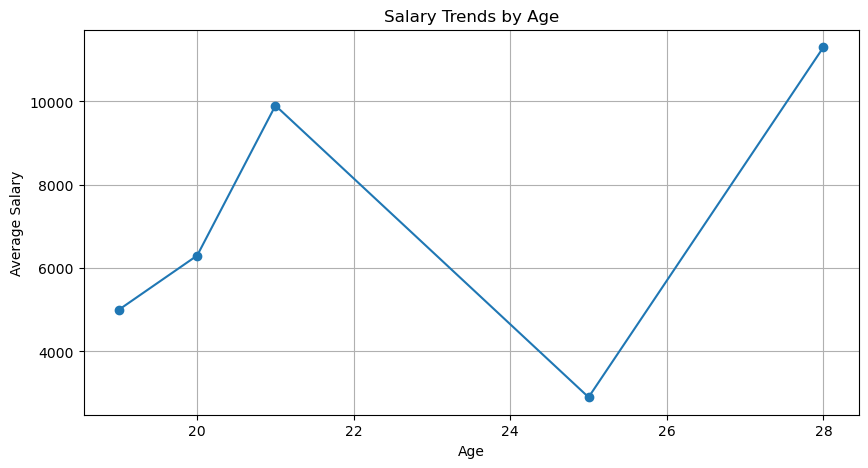

In [18]:
import matplotlib.pyplot as plt
import pandas as pd
salary_trends = spark.sql('''
SELECT Age, AVG(Salary) AS AverageSalary
FROM employees
GROUP BY Age
ORDER BY Age
''').toPandas()
plt.figure(figsize=(10, 5))
plt.plot(salary_trends['Age'], salary_trends['AverageSalary'], marker='o')
plt.xlabel('Age')
plt.ylabel('Average Salary')
plt.title('Salary Trends by Age')
plt.grid(True)
plt.show()

Homework

+---------+--------------+-----------+
| DeptName|TotalEmployees|TotalSalary|
+---------+--------------+-----------+
|       HR|             3|      26200|
|Marketing|             2|       9200|
+---------+--------------+-----------+



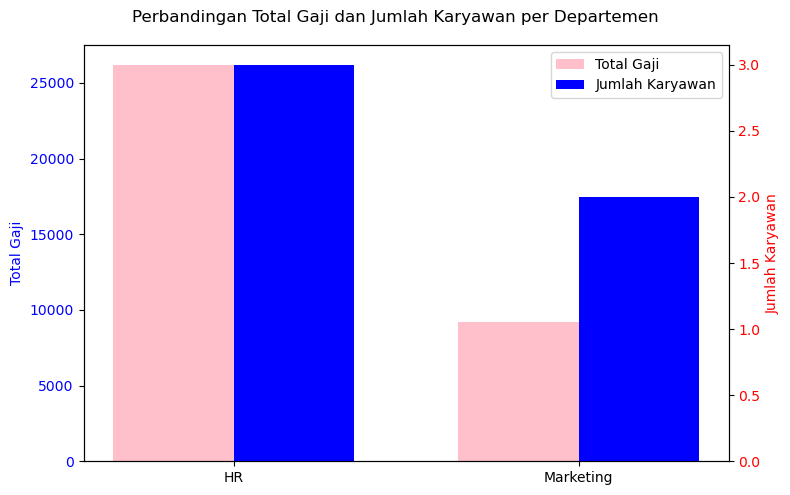

In [30]:
# Query Spark SQL
dept_analysis = spark.sql('''
SELECT 
    d.DeptName,
    COUNT(e.Name) AS TotalEmployees,
    SUM(e.Salary) AS TotalSalary
FROM employees e
JOIN departments d ON e.DeptId = d.DeptId
GROUP BY d.DeptName
''')

dept_analysis.show()
dept_pd = dept_analysis.toPandas()
x = np.arange(len(dept_pd['DeptName']))
width = 0.35

fig, ax1 = plt.subplots(figsize=(8,5))

# Sumbu kiri untuk Total Gaji
bars1 = ax1.bar(x - width/2, dept_pd['TotalSalary'], width, color='pink', label='Total Gaji')
ax1.set_ylabel('Total Gaji', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Sumbu kanan untuk Jumlah Karyawan
ax2 = ax1.twinx()
bars2 = ax2.bar(x + width/2, dept_pd['TotalEmployees'], width, color='blue', label='Jumlah Karyawan')
ax2.set_ylabel('Jumlah Karyawan', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Label dan judul
plt.xticks(x, dept_pd['DeptName'])
fig.suptitle('Perbandingan Total Gaji dan Jumlah Karyawan per Departemen')

# Tambahkan legend
fig.legend(loc='upper right', bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)

plt.tight_layout()
plt.show()


Karyawan dengan gaji di atas rata-rata per usia:


+----+---+------+
|Name|Age|Salary|
+----+---+------+
+----+---+------+



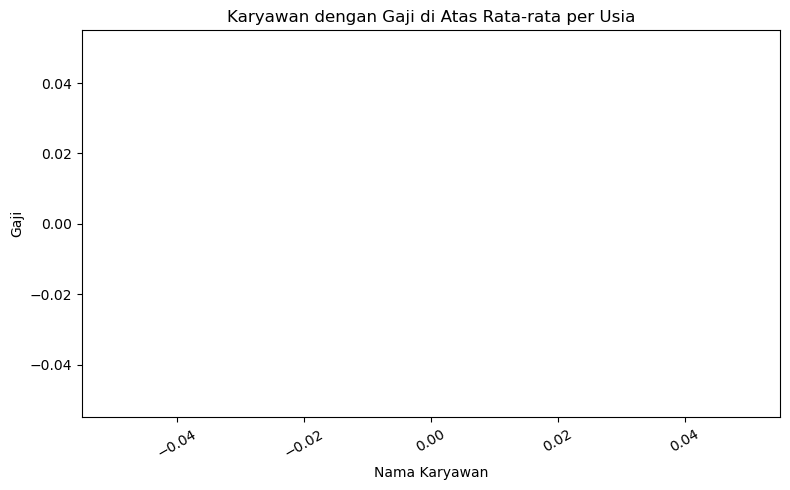

In [33]:
above_avg_salary = spark.sql('''
SELECT Name, Age, Salary
FROM employees e
WHERE Salary > (
    SELECT AVG(Salary)
    FROM employees e2
    WHERE e2.Age = e.Age
)
''')

# Tampilkan hasil
print("Karyawan dengan gaji di atas rata-rata per usia:")
above_avg_salary.show()

# Konversi ke Pandas untuk visualisasi
df = above_avg_salary.toPandas()

# Visualisasi dalam bentuk grafik batang
plt.figure(figsize=(8, 5))
plt.bar(df['Name'], df['Salary'], color='lightcoral')
plt.title('Karyawan dengan Gaji di Atas Rata-rata per Usia')
plt.xlabel('Nama Karyawan')
plt.ylabel('Gaji')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


+------+---+------+------+------+
|  Name|Age|Gender|Salary|DeptId|
+------+---+------+------+------+
|Farhan| 22|     F|  7675|     3|
| Erlyn| 39|     M|  6505|     4|
|  Bayu| 26|     M|  3458|     3|
| Erlyn| 25|     M|  3978|     3|
|Farhan| 36|     M|  4924|     4|
+------+---+------+------+------+



    DeptName  TotalEmployees  AvgSalary  TotalSalary
0         HR              28    5446.57       152504
1    Finance              26    5387.65       140079
2         IT              26    5157.58       134097
3  Marketing              20    5043.40       100868


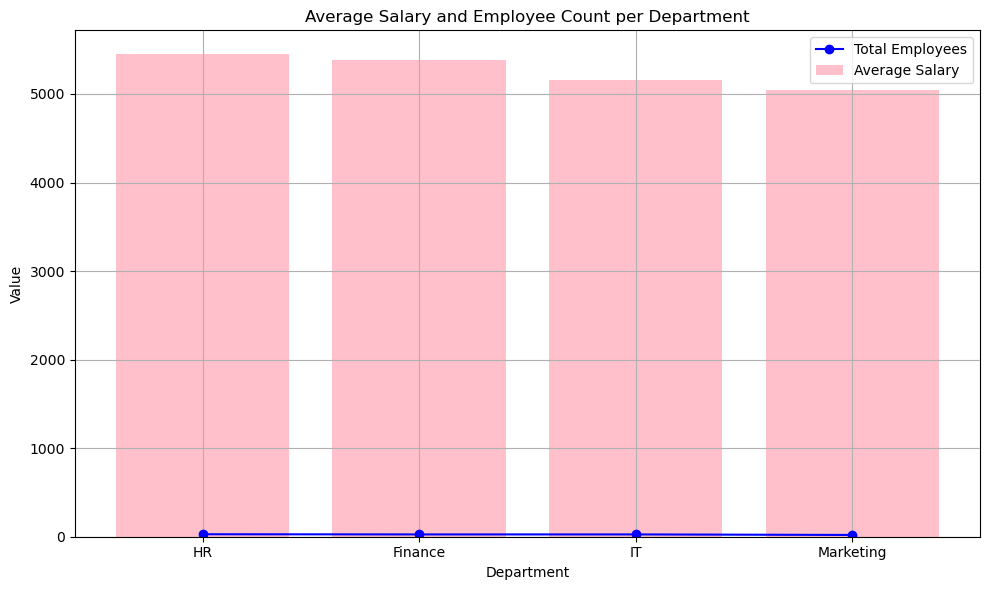

In [37]:
# Homework Nomor 3: Analisis Mendalam Data Karyawan
from pyspark.sql import SparkSession
import random
import matplotlib.pyplot as plt

# Inisialisasi SparkSession
spark = SparkSession.builder.appName("Homework 3 - Analisis Karyawan").getOrCreate()
names = ['Erlyn', 'Abimanyu', 'Priyo', 'Nur', 'Aulia', 'Rizki', 'Dewi', 'Bayu', 'Sinta', 'Farhan']
genders = ['M', 'F']
departments_data = [(1, 'HR'), (2, 'Marketing'), (3, 'IT'), (4, 'Finance')]
data_large = [
    (random.choice(names), random.randint(22, 50), random.choice(genders),
     random.randint(2500, 8000), random.randint(1, 4))
    for _ in range(100)
]
# Membuat DataFrame Spark
employees_large = spark.createDataFrame(data_large, ['Name', 'Age', 'Gender', 'Salary', 'DeptId'])
departments_large = spark.createDataFrame(departments_data, ['DeptId', 'DeptName'])
employees_large.createOrReplaceTempView('employees_large')
departments_large.createOrReplaceTempView('departments_large')

# cek 5 data pertama
spark.sql("SELECT * FROM employees_large LIMIT 5").show()

# rata-rata, total, jumlah
dept_analysis = spark.sql('''
SELECT d.DeptName,
       COUNT(e.Name) AS TotalEmployees,
       ROUND(AVG(e.Salary), 2) AS AvgSalary,
       SUM(e.Salary) AS TotalSalary
FROM employees_large e
JOIN departments_large d ON e.DeptId = d.DeptId
GROUP BY d.DeptName
ORDER BY AvgSalary DESC
''').toPandas()

print(dept_analysis)

# Visualisasi data
plt.figure(figsize=(10, 6))
plt.bar(dept_analysis['DeptName'], dept_analysis['AvgSalary'], color='pink', label='Average Salary')
plt.plot(dept_analysis['DeptName'], dept_analysis['TotalEmployees'], marker='o', color='blue', label='Total Employees')
plt.xlabel('Department')
plt.ylabel('Value')
plt.title('Average Salary and Employee Count per Department')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
